# Threshold in the relationship between mean protein and protein coding gene lengths 
**for the different species for which we have annotations for both proteins (reference proteomes) and protein coding genes** 

## Import python modules

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
#
from plotnine import *
import sys
sys.path.append('../lib/')
import constants as c
import retrieve_data__functions as rd

# Initialize parameters
BOOL_QUALITY = "MERGED" # "NOISE_INCLUDING_WRONG_ANNOTATIONS" "MERGED" "ONLY_HIGH_QUALITY_GENOMES"               

BOOL_ALSO_THREE_DOMAIN_SYSTEM = 1

## The protein and protein coding gene length distributions for the different species

### Retrieving the statistical descriptions of the length's distributions

In [2]:
# select the distributions for different species 
if (BOOL_QUALITY == "MERGED") or (BOOL_QUALITY == "ONLY_HIGH_QUALITY_GENOMES"):
    stat_file = c.STAT_MERGED_FILE
elif BOOL_QUALITY == "NOISE_INCLUDING_WRONG_ANNOTATIONS":
    stat_file = c.WRONG_ANNOTATIONS_MERGED_FILE
print("The statistical descriptions for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
merged = pd.read_csv(stat_file, low_memory=False, sep="\t")
merged = merged[["genes_species", "merged_division_superregnum", "prots_superregnum", "tax_id", "prots_mean", "prots_var", "genes_mean", "genes_var"]] 
merged.rename(columns = {"genes_species": 'species',
                         "merged_division_superregnum": 'Group of organisms',
                         "prots_superregnum": "Three-domain system"}, inplace = True)

# visualize data
if 1:
    pd.set_option('display.max_columns', None)
    display(merged.head(1))
    print(merged.shape)
    print('\n', merged["Group of organisms"].value_counts(), sep="")

The statistical descriptions for the different species is in:
 /home/emuro/git/github/EM_geneLength_nature/main_work/../lib/../main_tables/stat_merged.tsv 



,species,Group of organisms,Three-domain system,tax_id,prots_mean,prots_var,genes_mean,genes_var
0,archangium_gephyra_gca_001027285,bacteria,bacteria,48,367.499703,141204.779058,1103.871035,1.270278e+06


(6519, 8)

Group of organisms
bacteria         5468
fungi             533
archaea           227
vertebrates        92
protists           91
plants             59
invertebrates      49
Name: count, dtype: int64


In [3]:
if BOOL_QUALITY == "ONLY_HIGH_QUALITY_GENOMES":
    species_hq__l = rd.from_species_list_retrieve_species_with_HQG(merged["species"].to_list())
    merged = merged[merged['species'].isin(species_hq__l)]
    # visualize data
    if 1:
        pd.set_option('display.max_columns', None)
        display(merged.head(1))
        print(merged.shape)
        print('\n', merged["Group of organisms"].value_counts(), sep="")

## Python functions

In [4]:
def plot__comparing_genes_prots(df2plot, col_x, col_y, x_lab, y_lab, title, legend): 
    # limits and tick-breaks
    if 0: # manual set up
        x_limits = [300,90000] # [100, 1000]
        y_limits = [100, 1100] # [7000, 1200000]
    else: # automatic
        x_limits=[min(df2plot[col_x].to_list())/1.3, 1.1*max(df2plot[col_x].to_list())]
        y_limits=[min(df2plot[col_y].to_list())/1.4, 1.1*max(df2plot[col_y].to_list())]
    x_breaks = [500, 1000, 1500, 2000, 2500, 5000, 7500, 10000, 15000, 20000, 30000, 40000, 50000, 80000]
    x_breaks = [1000, 1500, 10000, 100000, 200000]
    if 0: # check
        print(x_limits, y_limits)
        print(x_breaks)

    palette_colors = c.OLD_COLOR_ORG_GROUPS
    if (legend =='Three-domain system'):
        palette_colors = c.COLOR_KINGDOMS  
    p = (   
        ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + geom_point(size=0.75)
        + geom_hline(yintercept = 500, alpha=0.3) # add one horizonal line
        + labs(title=title, x=x_lab, y=y_lab) 
        + scale_color_manual(values=palette_colors)
        + labs(color=legend) # legend title
        + scale_x_log10(breaks=x_breaks, limits=x_limits)
        + scale_y_log10(breaks=[100*x for x in range(1, 11)], limits=y_limits)
        + theme(legend_position=(0.8,0.3), legend_key_size=9, legend_background=element_rect(fill='gray', alpha=0.01))  
        + theme(figure_size=(18,6)) # preserve the scale of the units nt vs. 3*aa
    )
    if 1:
        print(p)

## Comparing the $\mu$ in different species: proteins vs. protein coding genes ($log10$ scale visualization)

In [5]:
df2plot = merged
col_x = "genes_mean"
col_y = "prots_mean"
#
title = "Relationship between mean protein and protein coding gene lengths ($log_{10}$ scale)"
x_lab = "Mean gene length (nt)"
y_lab = "Mean protein length (aa)"

### Three-domain system

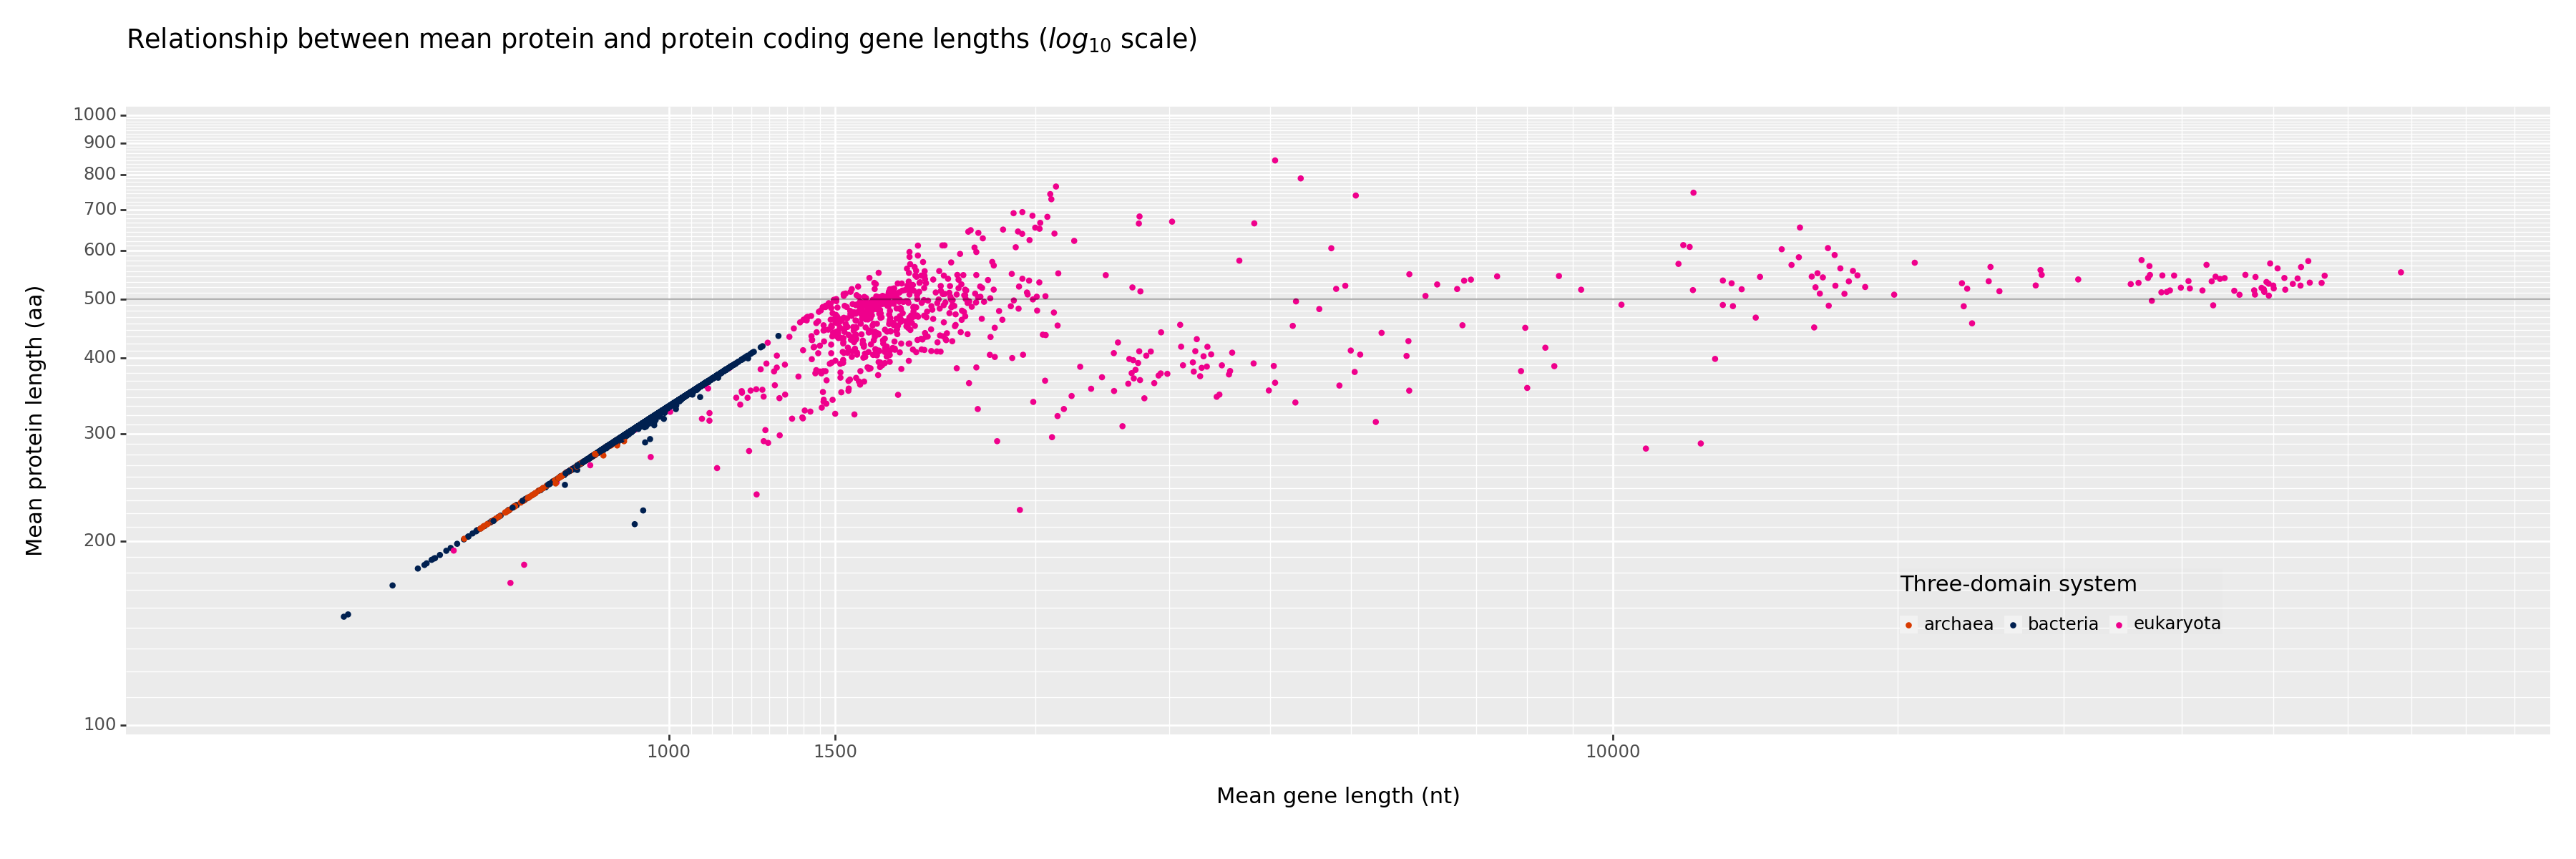

In [6]:
if BOOL_ALSO_THREE_DOMAIN_SYSTEM:
    legends_by = "Three-domain system"
    plot__comparing_genes_prots(df2plot, col_x, col_y, x_lab, y_lab, title, legends_by)

**Figure caption:**   
Each point represents, for one species, the mean of the distribution of the length of its protein coding genes versus the mean of the distribution of the length of its proteins. The horizontal line describes the trend observed in these data, going from a regime in which the average size of the proteins grows proportionally (x3) to the average size of the genes, to another in which the size of the protein stabilizes and does not depend on gene length; $\mu_{c}$=(1500nt, 500aa).

### Group of organisms

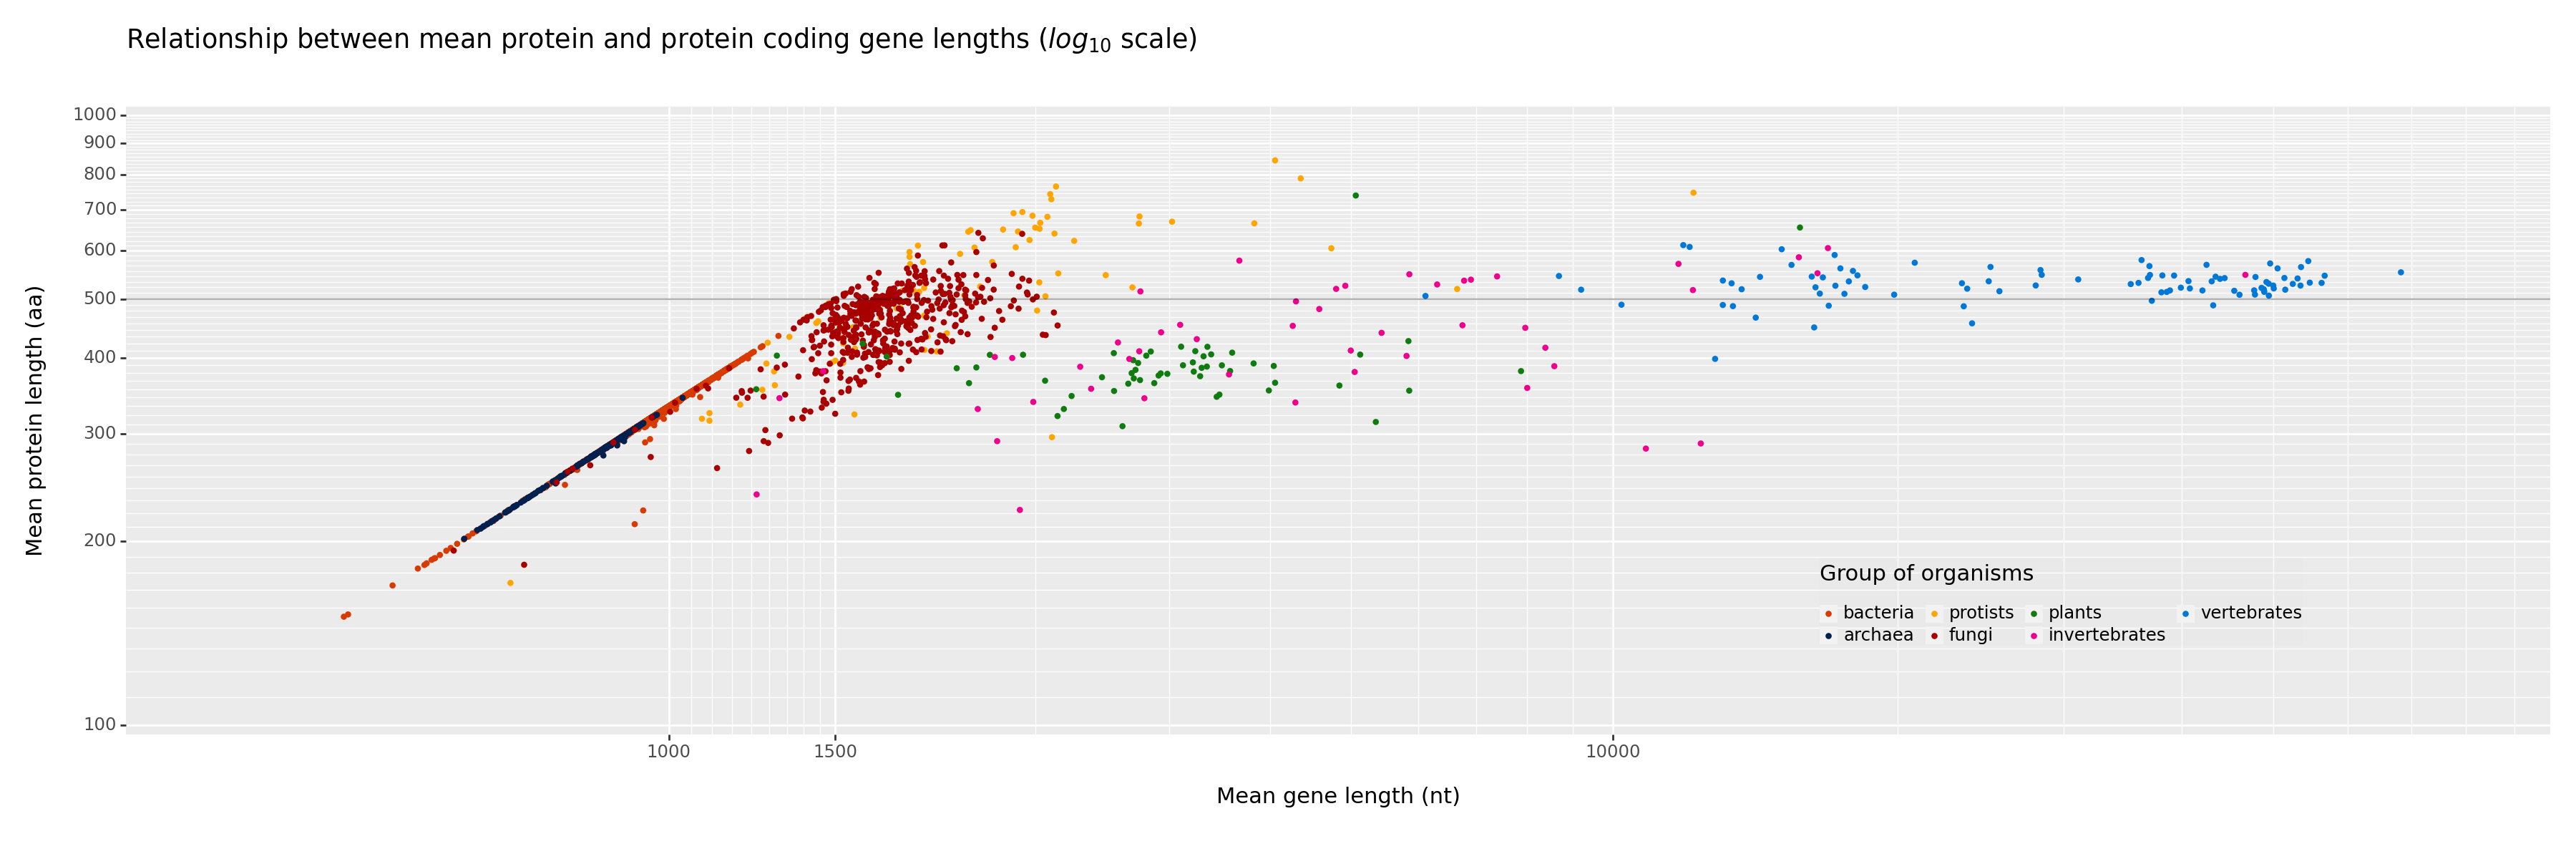

In [7]:
legends_by = "Group of organisms"

# Sort 
df2plot[legends_by] = pd.Categorical(df2plot[legends_by], 
                                    categories=c.ORG_GROUPS,           
                                    ordered=True)
df2plot.sort_values(legends_by, inplace=True)
plot__comparing_genes_prots(df2plot, col_x, col_y, x_lab, y_lab, title, legends_by)